In [1]:
import os
import sys
import pdb
import re
import json
import copy
import pickle
import glob
import tqdm
import importlib
import numpy as np
import pandas as pd
import multiprocessing

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import util

sys.path.append('/om2/user/msaddler/tfauditoryutil')
import util_localization_psychophysics
import util_localization_psychophysics_figures

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli
import util_misc


In [2]:
with open('data/model_data_localization.pkl', 'rb') as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
for k in EXPERIMENT_DATAFRAMES.keys():
    print(k)

map_k_to_tag_model = {
    'human': "human",
    '3000': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/IHC3000Hz_anf384H160M096L/archFrancl??",
    '1000': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/IHC1000Hz_anf384H160M096L/archFrancl??",
    '320': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/IHC0320Hz_anf384H160M096L/archFrancl??",
    '50': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/IHC0050Hz_anf384H160M096L/archFrancl??",
    '3000_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/IHC3000Hz_anf384H160M096L/archFrancl??",
#     '1000_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/IHC1000Hz_anf384H160M096L/archFrancl??",
#     '320_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/IHC0320Hz_anf384H160M096L/archFrancl??",
#     '50_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/IHC0050Hz_anf384H160M096L/archFrancl??",
    '3000_simple': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/spont0_simplified_IHC3000/archFrancl??",
    '1000_simple': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/spont0_simplified_IHC1000/archFrancl??",
    '320_simple': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/spont0_simplified_IHC0320/archFrancl??",
    '50_simple': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/spont0_simplified_IHC0050/archFrancl??",
    '3000_delayed_simple': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/spont0_simplified_IHC3000/archFrancl??",
#     '1000_simple_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/spont0_simplified_IHC1000/archFrancl??",
#     '320_simple_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/spont0_simplified_IHC0320/archFrancl??",
#     '50_simple_delayed': "/om2/user/msaddler/tfauditoryutil/saved_models/models_localize/v01/grouped/before_pool_factor2/spont0_simplified_IHC0050/archFrancl??",
}


maa_azimuth
maa_frequency
itd_threshold
itd_ild_weighting
spectral_smoothing
precedence_effect_localization
new_ears
bandwidth_dependency
mp_spectral_cues
snr_dependency
speech_in_noise_in_reverb


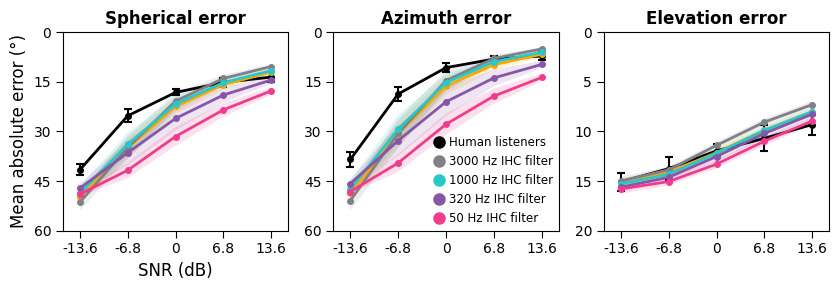

figures_poster/results_localization_snr_dependency.pdf


In [3]:
importlib.reload(util_localization_psychophysics_figures)

df_results = EXPERIMENT_DATAFRAMES['snr_dependency']
list_k_model = [
    'human',
    '3000_delayed',
    '3000',
    '1000',
    '320',
    '50',
    
    # 'human',
    # '3000_delayed_simple',
    # '3000_simple',
    # '1000_simple',
    # '320_simple',
    # '50_simple',
]
dict_key_metric = {
    'deg_err': {
        'str_title': 'Spherical error',
        'ylimits': [60, 0],
        'yticks': [60, 45, 30, 15, 0],
    },
    'deg_azim_err': {
        'str_title': 'Azimuth error',
        'ylimits': [60, 0],
        'yticks': [60, 45, 30, 15, 0],
    },
    'deg_elev_err': {
        'str_title': 'Elevation error',
        'ylimits': [20, 0],
        'yticks': [20, 15, 10, 5, 0],
    },
}
nrows = 1
ncols = len(dict_key_metric)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8.5, 3.0))

for itr_ax, key_metric in enumerate(dict_key_metric.keys()):
    ax = ax_arr[itr_ax]
    for k_model in list_k_model:
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model
        ])]
        if 'pool' in tag_model:
            color = 'orange'
            label = None
        kwargs_format_axes_update = {
            'fontweight_title': 'bold',
            'fontsize_ticks': 10,
            'str_ylabel': 'Mean absolute error (°)' if itr_ax == 0 else None,
            'str_xlabel': 'SNR (dB)' if itr_ax == 0 else None,
        }
        kwargs_format_axes_update.update(dict_key_metric[key_metric])
        kwargs_plot_update = {
            'color': color,
            'label': label,
        }
        ax = util_localization_psychophysics_figures.make_plot_snr_dependency(
            ax,
            dfi,
            key_metric=key_metric,
            kwargs_plot_update=kwargs_plot_update,
            kwargs_format_axes_update=kwargs_format_axes_update)
    if itr_ax == 1:
        kwargs_legend = {
            'loc': 'lower right',
            'borderpad': 0.5,
            'borderaxespad': 0,
            'frameon': False,
            'framealpha': 1.0,
            'facecolor': 'w',
            'edgecolor': 'k',
            'handlelength': 0,
            'markerscale': 2.0,
            'fontsize': 8.5,
        }
        ax.legend(**kwargs_legend)
plt.tight_layout()
plt.show()

fn_fig = 'figures_poster/results_localization_snr_dependency.pdf'
# fn_fig = 'figures_src/results_localization_snr_dependency.pdf'
if 'simple' in list_k_model[-1]:
    fn_fig = fn_fig.replace('.pdf', '_simple.pdf')
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


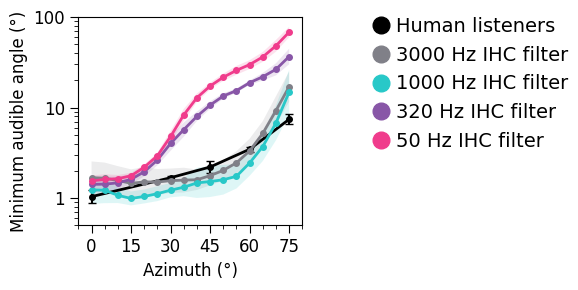

figures_src/results_localization_minimum_audible_angle.pdf


In [50]:
df_results = EXPERIMENT_DATAFRAMES['maa_azimuth']

list_list_k_model = [
    ['human', '3000', '1000', '320', '50'],
#     ['human', '3000_delayed', '1000_delayed', '320_delayed', '50_delayed'],
#     ['human', '3000_simple', '1000_simple', '320_simple', '50_simple'],
#     ['human', '3000_delayed_simple', '1000_delayed_simple', '320_delayed_simple', '50_delayed_simple'],
]
for list_k_model in list_list_k_model:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
    for k_model in list_k_model:
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model,
        ])]
        x = dfi.azim_ref.values
        y = np.exp(dfi['log_maa_mean'].values)
        if 'human' in tag_model.lower():
            ax.errorbar(
                x=x,
                y=y,
                yerr=[
                    y - np.exp(dfi['log_maa_mean'].values - 2 * dfi['log_maa_sem'].values),
                    np.exp(dfi['log_maa_mean'].values + 2 * dfi['log_maa_sem'].values) - y,
                ],
                color=color,
                capsize=3,
                capthick=1,
                ls='')
        else:
            ax.fill_between(
                dfi.azim_ref,
                np.exp(dfi['log_maa_mean'].values - 2 * dfi['log_maa_sem'].values),
                np.exp(dfi['log_maa_mean'].values + 2 * dfi['log_maa_sem'].values),
                alpha=0.15,
                facecolor=color,
                label=None)
        ax.plot(
            x,
            y,
            color=color,
            label=label,
            marker='o',
            ms=4,
            lw=2)
    legend_plot_kwargs = {
        'loc': 'upper left',
        'frameon': False,
        'handlelength': 0,
        'markerscale': 3,
        'fontsize': 14,
        'borderpad': 0,
        'borderaxespad': 0,
        'bbox_to_anchor': (1.35, 1.00),
    }
    ax.legend(**legend_plot_kwargs)
    ax = util_figures.format_axes(
        ax,
        yscale='log',
        ylimits=[0.5, 100],
        yticks=[1, 10, 100],
        yticklabels=[1, 10, 100],
        xticks_minor=np.arange(-5, 81, 5),
        xticks=np.arange(0, 80, 15),
        str_ylabel='Minimum audible angle (°)',
        str_xlabel='Azimuth (°)',
    )
    plt.tight_layout()
    plt.show()

    fn_fig = 'figures_src/results_localization_minimum_audible_angle.pdf'
    fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
    print(fn_fig)


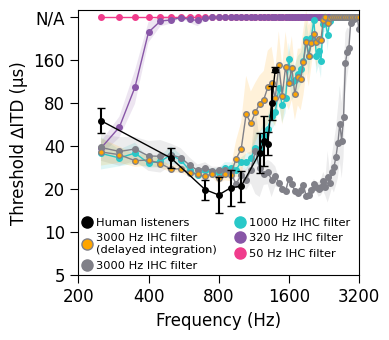

figures_poster/results_localization_itd_threshold_delayed_binaural_integration.pdf


In [15]:
df_results = EXPERIMENT_DATAFRAMES['itd_threshold']

list_list_k_model = [
    ['50', '320', '1000', '3000', '3000_delayed', 'human'],
    # ['human', '3000', '1000', '320', '50'],
    # ['human', '3000', '3000_delayed'],
#     ['human', '3000_delayed', '1000_delayed', '320_delayed', '50_delayed'],
#     ['human', '3000_simple', '1000_simple', '320_simple', '50_simple'],
]
for list_k_model in list_list_k_model:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0, 3.5))
    for k_model in list_k_model:
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        if (k_model == '3000_delayed') and len(list_k_model) == 3:
            mfc = 'orange'
            label = '3000 Hz IHC filter (delayed integration)'
        elif (k_model == '3000_delayed') and len(list_k_model) == 6:
            mfc = 'orange'
            label = '3000 Hz IHC filter\n(delayed integration)'
        else:
            mfc = color
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model,
        ])]
        x = dfi['f'].values
        y = np.exp(dfi['log_itd_threshold_mean'].values)
        if 'human' in tag_model.lower():
            ax.errorbar(
                x=x,
                y=y,
                yerr=[
                    y - np.exp(dfi['log_itd_threshold_mean'].values - 1 * dfi['log_itd_threshold_sem'].values),
                    np.exp(dfi['log_itd_threshold_mean'].values + 1 * dfi['log_itd_threshold_sem'].values) - y,
                ],
                color=color,
                capsize=3,
                capthick=1,
                ls='')
        else:
            ax.fill_between(
                x,
                np.exp(dfi['log_itd_threshold_mean'].values - 2 * dfi['log_itd_threshold_sem'].values),
                np.exp(dfi['log_itd_threshold_mean'].values + 2 * dfi['log_itd_threshold_sem'].values),
                alpha=0.15,
                facecolor=mfc,
                label=None)
        ax.plot(
            x,
            y,
            color=color,
            label=label,
            marker='o',
            mfc=mfc,
            mew=1.0,
            ms=4,
            lw=1.0)
    legend_plot_kwargs = {
        'loc': 'lower center',
        'frameon': False,
        'handlelength': 0,
        'markerscale': 2,
        'fontsize': 8.2 if len(list_k_model) == 6 else 9,
        'borderaxespad': 0,
        'ncol': 2 if len(list_k_model) > 3 else 1,
    }
    if len(list_k_model) == 6:
        handles, labels = ax.get_legend_handles_labels()
        legend_plot_kwargs['handles'] = handles[::-1]
    ax.legend(**legend_plot_kwargs)
    ax = util_figures.format_axes(
        ax,
        yscale='log',
        xscale='log',
        ylimits=[5, 360],
        yticks=[5, 10, 20, 40, 80, 160, 320],
        yticks_minor=[],
        yticklabels=[5, 10, 20, 40, 80, 160, 'N/A'],
        xlimits=[200, 3200],
        xticks=[200, 400, 800, 1600, 3200],
        xticks_minor=[],
        xticklabels=[200, 400, 800, 1600, 3200],
        str_ylabel='Threshold ∆ITD (µs)',
        str_xlabel='Frequency (Hz)',
    )
    
    ax.set_facecolor('w')
    fig.patch.set_color('none')
    
    plt.tight_layout()
    plt.show()
    if len(list_k_model) != 6:
        fn_fig = 'figures_src/results_localization_itd_threshold.pdf'
    else:
        fn_fig = 'figures_poster/results_localization_itd_threshold.pdf'
    if '3000_delayed' in list_k_model:
        fn_fig = fn_fig.replace('.pdf', '_delayed_binaural_integration.pdf')
    fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=False)
    print(fn_fig)


In [24]:
# df_results = EXPERIMENT_DATAFRAMES['itd_ild_weighting']

# importlib.reload(util_localization_psychophysics_figures)

# list_k_model = [
#     'human',
#     '3000',
#     '1000',
#     '320',
#     '50',
# ]

# nrows = 1
# ncols = int(np.ceil(len(list_k_model) / nrows))
# fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.5 * ncols, 2.75 * nrows), sharey=True)
# ax_arr = ax_arr.reshape([-1])
# for itr_ax, k_model in enumerate(list_k_model):
#     ax = ax_arr[itr_ax]
#     tag_model = map_k_to_tag_model[k_model]
#     color, label = util.get_color_and_label_from_model_tag(tag_model)
#     dfi = df_results[np.logical_and.reduce([
#         df_results.tag_model == tag_model,
#     ])]
#     ax = util_localization_psychophysics_figures.make_plot_itd_ild_weighting(
#         ax,
#         dfi,
#         color=color,
#         include_legend=itr_ax == 0,
#         str_title=label)
#     if itr_ax > 0:
#         ax.xaxis.label.set_color('w')
#         ax.yaxis.label.set_color('w')
# plt.tight_layout()
# plt.show()


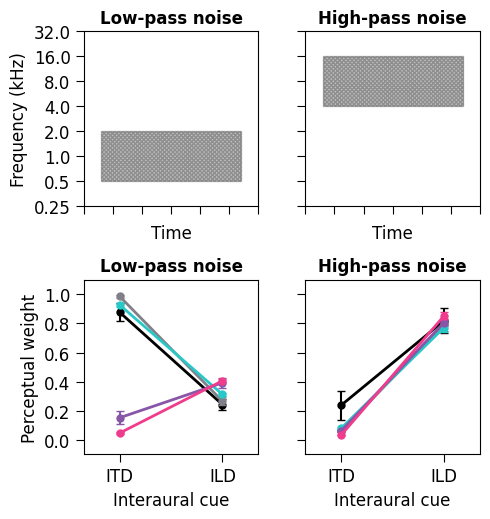

figures_src/results_localization_itd_ild_weighting.pdf


In [38]:
df_results = EXPERIMENT_DATAFRAMES['itd_ild_weighting']

importlib.reload(util_localization_psychophysics_figures)

def schematic_spectrogram(ax, t, f, **kwargs):
    '''
    '''
    xy = (t[0], f[0])
    width = t[1] - t[0]
    height = f[1] - f[0]
    rect = matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
    ax.add_patch(rect)
    return ax

list_k_model = [
    'human',
    # '3000_delayed',
    '3000',
    '1000',
    '320',
    '50',
#     '3000_delayed',
#     '1000_delayed',
#     '320_delayed',
#     '50_delayed',
]

nrows = 2
ncols = 2
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.5 * ncols, 2.65 * nrows), sharey='row')

list_band = ['(500, 2000)', '(4000, 16000)']
for itr_ax, band in enumerate(list_band):
    ax = ax_arr[0, itr_ax]
    ax = schematic_spectrogram(
        ax,
        t=(0.1, 0.9),
        f=(4.0, 16.0) if '4000' in band else (0.5, 2.0),
        color='k',
        alpha=0.25,
        hatch='xxxxxxxx',
        rasterized=True)
    yticks = np.array([250, 500, 1000, 2000, 4000, 8000, 16000, 32000]) / 1e3
    yticklabels = yticks
    xticks = np.arange(0, 1.1, 1/6)
    xticklabels = []
    ylimits = [yticks[0], yticks[-1]]
    ax = util_figures.format_axes(
        ax,
        str_xlabel='Time',
        str_ylabel='Frequency (kHz)' if itr_ax == 0 else None,
        str_title='High-pass noise' if '4000' in band else 'Low-pass noise',
        fontweight_title='bold',
        yticks=yticks,
        yticklabels=yticks,
        yticks_minor=[],
        xticks=xticks,
        xticklabels=xticklabels,
        xticks_minor=[],
        ylimits=ylimits,
        xscale='linear',
        yscale='log',
    )
    
    
    for k_model in list_k_model:
        ax = ax_arr[1, itr_ax]
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_results[np.logical_and.reduce([
            df_results.tag_model == tag_model,
        ])]
        label = label.replace(' IHC filter', '').replace(' listener', '')
        if 'pool' in tag_model:
            color = 'orange'
            label = None
        kwargs_plot_update = {
            'color': color,
            'mfc': color,
            'ls': '-',
            'ms': 4,
            'label': label,
        }
        kwargs_legend_update = {
            'loc': 'upper left',
            'frameon': False,
            'handlelength': 0,
            'markerscale': 1.25,
            'fontsize': 9.,
            'borderaxespad': 0.5,
        }
        ax = util_localization_psychophysics_figures.make_plot_itd_ild_weighting(
            ax,
            dfi,
            list_band=[band],
            color=color,
            include_legend=False,
            kwargs_plot_update=kwargs_plot_update,
            kwargs_legend_update=kwargs_legend_update,
            str_title='High-pass noise' if '4000' in band else 'Low-pass noise',
            fontweight_title='bold',
            yticks=np.arange(0, 1.1, 0.2),
            ylimits=[-0.1, 1.1],
            )
        if itr_ax > 0:
#             ax.xaxis.label.set_color('w')
            ax.yaxis.label.set_color('w')
plt.tight_layout()
plt.show()

# fn_fig = 'figures_poster/results_localization_itd_ild_weighting.pdf'
fn_fig = 'figures_src/results_localization_itd_ild_weighting.pdf'
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


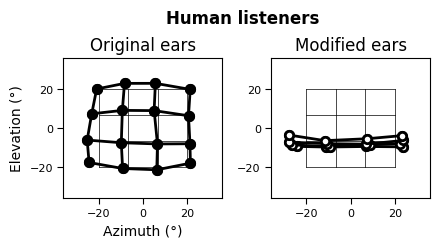

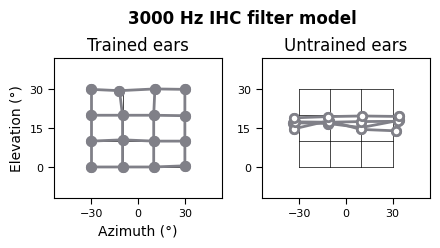

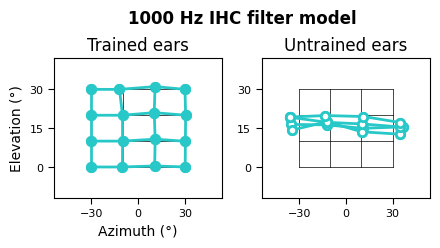

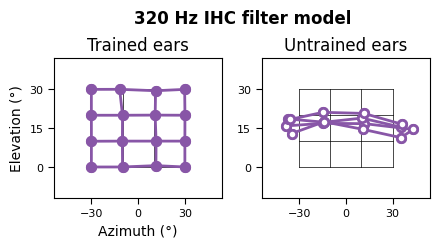

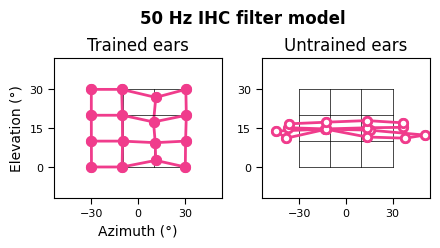

In [7]:
df_results = EXPERIMENT_DATAFRAMES['new_ears']

list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
#     '3000_delayed',
#     '1000_delayed',
#     '320_delayed',
#     '50_delayed',
]

for k_model in list_k_model:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    if 'pool' in tag_model:
        color = 'orange'
        label = label + ' (delayed)'
    df_old = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_model,
        df_results.new_ears == False,
    ])]
    df_new = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_model,
        df_results.new_ears == True,
    ])]
    fig, ax_arr = plt.subplots(figsize=(4.5, 2.65), nrows=1, ncols=2)
    kwargs_ref = {
        'lw': 0.5,
        'color': 'k',
        'marker': None,
    }
    kwargs_plot = {
        'lw': 2.0,
        'ls': '-',
        'marker': 'o',
        'mew': 2.0,
        'ms': 6,
        'color': color
    }
    for itr_ax, df in enumerate([df_old, df_new]):
        ax = ax_arr[itr_ax]
        kwargs_plot_diff = {
            'mfc': 'w' if itr_ax == 1 else None,
        }
        for azim_true in np.unique(df.azim_true):
            dfi = df[df.azim_true == azim_true].sort_values(by='elev_true')
            x_ref = dfi.azim_true
            y_ref = dfi.elev_true
            ax.plot(x_ref, y_ref, **kwargs_ref)
            x = dfi.azim_pred_mean
            y = dfi.elev_pred_mean
            ax.plot(x, y, **kwargs_plot, **kwargs_plot_diff)
        for elev_true in np.unique(df.elev_true):
            dfi = df[df.elev_true == elev_true].sort_values(by='azim_true')
            x_ref = dfi.azim_true
            y_ref = dfi.elev_true
            ax.plot(x_ref, y_ref, **kwargs_ref)
            x = dfi.azim_pred_mean
            y = dfi.elev_pred_mean
            ax.plot(x, y, **kwargs_plot, **kwargs_plot_diff)
        xticks = [-30, 0, 30]
        yticks = [0, 15, 30]
        str_title = 'Trained ears' if itr_ax == 0 else 'Untrained ears'
        if 'human' in tag_model.lower():
            xticks = [-20, 0, 20]
            yticks = xticks
            str_title = 'Original ears' if itr_ax == 0 else 'Modified ears'
        xr = (xticks[-1] - xticks[0]) / 2.5
        yr = (yticks[-1] - yticks[0]) / 2.5
        xlimits = [xticks[0] - xr, xticks[-1] + xr]
        ylimits = [yticks[0] - yr, yticks[-1] + yr]  
        
        ax = util_figures.format_axes(
            ax,
            xticks=xticks,
            yticks=yticks,
            xlimits=xlimits,
            ylimits=ylimits,
            fontsize_ticks=8,
            fontsize_labels=10,
            str_title=str_title,
            str_xlabel='Azimuth (°)' if itr_ax == 0 else None,
            str_ylabel='Elevation (°)' if itr_ax == 0 else None,
        )
    plt.suptitle(
        f'{label} model' if 'human' not in label.lower() else label,
        x=0.55,
        y=0.92,
        weight='bold')
    plt.tight_layout()
    plt.show()
    
#     fn_fig = 'figures_src/results_localization_new_ears_{}.pdf'.format(k_model)
#     fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
#     print(fn_fig)


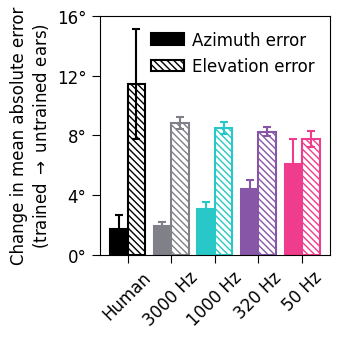

figures_src/results_localization_new_ears.pdf


In [8]:
df_results = EXPERIMENT_DATAFRAMES['new_ears']

list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
#     '3000_delayed',
#     '1000_delayed',
#     '320_delayed',
#     '50_delayed',
]

df = df_results.groupby(['tag_model', 'new_ears']).agg({
    'azim_true': list,
    'elev_true': list,
    'azim_pred_arr': list,
    'elev_pred_arr': list,
}).reset_index()

def compute_error(df, key='azim'):
    y = np.array(df[f'{key}_pred_arr'])
    x = np.array(df[f'{key}_true'])
    x = x[:, np.newaxis, np.newaxis] * np.ones_like(y)
    x = x.mean(axis=-1)
    y = y.mean(axis=-1)
    shape = y.shape
    x = x.reshape([-1])
    y = y.reshape([-1])
    err = util_localization_psychophysics.angular_distance(x, y).reshape(shape)
    err = np.mean(err, axis=0)
    while err.ndim > 1:
        err = np.mean(err, axis=-1)
    return err

df['azim_err'] = df.apply(compute_error, key='azim', axis=1)
df['elev_err'] = df.apply(compute_error, key='elev', axis=1)
df_old = df[df['new_ears'] == False].reset_index(drop=True)
df_new = df[df['new_ears'] == True].reset_index(drop=True)

list_delta_azim_err = []
list_delta_elev_err = []
for itr0 in range(len(df_new)):
    dfi_new = df_new.iloc[itr0]
    dfi_old = df_old.iloc[itr0]
    list_delta_azim_err.append(np.array(dfi_new['azim_err']) - np.array(dfi_old['azim_err']))
    list_delta_elev_err.append(np.array(dfi_new['elev_err']) - np.array(dfi_old['elev_err']))
df_new['delta_azim_err'] = list_delta_azim_err
df_new['delta_elev_err'] = list_delta_elev_err
df_new['delta_azim_err_mean'] = df_new['delta_azim_err'].map(lambda _: np.mean(_))
df_new['delta_elev_err_mean'] = df_new['delta_elev_err'].map(lambda _: np.mean(_))
df_new['delta_azim_err_sem'] = df_new['delta_azim_err'].map(lambda _: np.std(_) / np.sqrt(len(_)))
df_new['delta_elev_err_sem'] = df_new['delta_elev_err'].map(lambda _: np.std(_) / np.sqrt(len(_)))

fig, ax = plt.subplots(figsize=(3.5, 3.5))
for itr_key, key in enumerate(['azim', 'elev']):
    xticks = []
    xticklabels = []
    for itr_model, k_model in enumerate(list_k_model):
        tag_model = map_k_to_tag_model[k_model]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        dfi = df_new[np.logical_and.reduce([
            df_new.tag_model == tag_model,
        ])]
        assert len(dfi) == 1
        dfi = dfi.iloc[0]
        x = itr_model + (-0.2 + 0.4 * itr_key)
        y = dfi[f'delta_{key}_err_mean']
        yerr = 2 * dfi[f'delta_{key}_err_sem']
        kwargs = {
            'color': 'w' if itr_key == 1 else color,
            'edgecolor': color,
            'lw': 1.5,
            'width': 0.4,
            'hatch': '\\\\\\\\\\' if itr_key == 1 else None,
        }
        if 'human' in tag_model.lower():
            kwargs['label'] = 'Azimuth error' if key == 'azim' else 'Elevation error'
        ax.bar(x, y, **kwargs)
        ax.errorbar(x, y, yerr, elinewidth=1.5, capthick=1.5, capsize=3, color=color)
        xticks.append(itr_model)
        xticklabels.append(label.replace(" IHC filter", "").replace(" listeners", ""))
legend_plot_kwargs = {
    'loc': 'upper right',
    'frameon': False,
    'handlelength': 2,
    'markerscale': 0,
    'fontsize': 12,
    'handletextpad': 0.5,
}
ax.legend(**legend_plot_kwargs)
ax = util_figures.format_axes(
    ax,
    ylimits=[0, 16],
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=[0, 4, 8, 12, 16],
    yticklabels=['0°', '4°', '8°', '12°', '16°'],
    str_ylabel=('Change in mean absolute error\n'
                r'(trained $\rightarrow$ untrained ears)'),
    fontweight_title='bold',
)
ax.set_xticklabels(xticklabels, rotation=45)
plt.tight_layout()
plt.show()

fn_fig = 'figures_src/results_localization_new_ears.pdf'
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


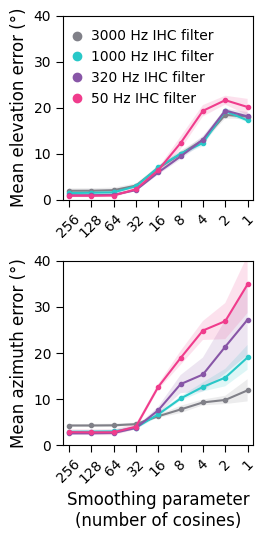

figures_src/results_localization_spectral_smoothing.pdf


In [9]:
df_results = EXPERIMENT_DATAFRAMES['spectral_smoothing']

list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
#     '3000_delayed',
#     '1000_delayed',
#     '320_delayed',
#     '50_delayed',
]

list_key_y_axis = [
    'deg_elev_err',
    'deg_azim_err',
]
nrows = len(list_key_y_axis)
ncols = 1
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.75 * ncols, 2.75 * nrows))
ax_arr = np.array(ax_arr).reshape([-1])
for k_model in list_k_model[1:]:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    df = df_results[df_results.tag_model == tag_model]
    for itr_ax, key_y_axis in enumerate(list_key_y_axis):
        ax = ax_arr[itr_ax]
        if f'{key_y_axis}_mean' in df.columns:
            x = df['smoothed'].values
            y = df[f'{key_y_axis}_mean'].values
            yerr = 2 * df[f'{key_y_axis}_sem'].values
            if not np.isnan(y).all():
                ax.fill_between(
                    x,
                    y-yerr,
                    y+yerr,
                    alpha=0.15,
                    facecolor=color,
                    label=None)
                ax.plot(x, y, color=color, label=label, marker='.', ms=6, lw=1.5)

for itr_ax, key_y_axis in enumerate(list_key_y_axis):
    ax = ax_arr[itr_ax]
    if itr_ax == 0:
        kwargs_legend = {
            'loc': 'upper left',
            'borderpad': 0.5,
            'handletextpad': 1.0,
            'borderaxespad': 0.5,
            'frameon': False,
            'handlelength': 0,
            'markerscale': 2.0,
            'fontsize': 10,
        }
        ax.legend(**kwargs_legend)
    xlimits = [256*1.2, 1 / 1.2]
    xticks = [256, 128, 64, 32, 16, 8, 4, 2, 1]
    xticklabels = xticks
    ylimits = [0, 40]
    yticks = [0, 10, 20, 30, 40]
    if key_y_axis == 'pct_correct':
        ylimits = [45, 100]
        yticks = [50, 60, 70, 80, 90, 100]
    ax = util_figures.format_axes(
        ax,
        str_xlabel=f'Smoothing parameter\n(number of cosines)' if itr_ax == 1 else None,
        str_ylabel='Mean azimuth error (°)' if 'azim' in key_y_axis else 'Mean elevation error (°)',
        fontsize_ticks=10,
        xlimits=xlimits,
        ylimits=ylimits,
        yticks=yticks,
        xticks=xticks,
        xticklabels=xticklabels,
        xscale='log',
        xticks_minor=[],
    )
    ax.set_xticklabels(xticklabels, rotation=45)
plt.tight_layout()
plt.show()

fn_fig = 'figures_src/results_localization_spectral_smoothing.pdf'
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


In [5]:
# df = pd.read_pickle('data/human_model_comparison_metrics_localization.pkl')
# dict_agg = {}
# for k in ['pearsonr', 'l2']:
#     dict_agg[k] = 'mean'
#     dict_agg[f'bootstrap_list_{k}'] = list
# df_mean = df.groupby(['tag_model']).agg(dict_agg).reset_index()
# for k in df_mean.columns:
#     if 'bootstrap_list_' in k:
#         df_mean[k] = df_mean[k].map(lambda _: np.array(list(_)).mean(axis=0))
# df_mean['tag_expt'] = 'AVERAGE'


In [10]:
# importlib.reload(util)

# df_to_plot = pd.concat([df, df_mean])
# list_tag_expt = [
#     'snr_dependency',
#     'itd_ild_weighting',
#     'maa_azimuth',
#     'maa_frequency',
#     'itd_threshold',
#     'new_ears',
#     'spectral_smoothing',
#     'mp_spectral_cues',
#     'precedence_effect_localization',
#     'bandwidth_dependency',
#     'AVERAGE',
# ]
# xticklabels = [
#     'Sound localization in noise',
#     'ITD / ILD cue weighting (Macpherson & Middlebrooks, 2002)',
#     'Minimum audible angle vs. azimuth (Mills, 1958)',
#     'Minimum audible angle vs. frequency (Mills, 1958)',
#     'ITD lateralization vs. frequency (Brughera et al., 2013)',
#     'Effect of changing ears (Hofman et al., 1998)',
#     'Effect of smoothing spectral cues (Kulkarni & Colburn, 1998)',
#     'Median plane spectral cues (Hebrank & Wright, 1974)',
#     'Precedence effect (Litovsky & Godar, 2010)',
#     'Bandwidth dependency of localization (Yost & Zhong, 2014)',
#     'Average',
# ]
# list_k = [
#     '3000_delayed',
#     '3000',
#     '1000',
#     '320',
#     '50',
# #     '3000_delayed_simple',
# #     '3000_simple',
# #     '1000_simple',
# #     '320_simple',
# #     '50_simple',
    
# #     '3000_delayed',
# #     '1000_delayed',
# #     '320_delayed',
# #     '50_delayed',
# ]
# list_tag_model = [map_k_to_tag_model[k] for k in list_k]

# for key_metric in ['pearsonr']:
#     fig, ax = plt.subplots(figsize=(15, 4))
#     width = 0.12 * (5 / len(list_k))
#     ci_percentile = 95
#     xticks = []
#     for itr_expt, tag_expt in enumerate(list_tag_expt):
#         xticks.append(itr_expt)
#         for itr_model, tag_model in enumerate(list_tag_model):
#             color, label = util.get_color_and_label_from_model_tag(tag_model)
#             ec, lw = ('k', 0.5)
#             hatch = None
#             if 'pool' in tag_model:
#                 ec, lw = (color, 2.0)
#                 hatch = '//////'
#                 color = 'orange'
#                 label = '3000 Hz IHC filter (delayed binaural integration)'
#             dfi = df_to_plot[np.logical_and.reduce([
#                 df_to_plot['tag_expt'] == tag_expt,
#                 df_to_plot['tag_model'] == tag_model,
#             ])]
#             if len(dfi) == 1:
#                 dfi = dfi.iloc[0]
#                 x = itr_expt + (itr_model - 2) * width
#                 y = dfi[key_metric]
#                 yerr = 2 * np.std(dfi[f'bootstrap_list_{key_metric}'])
#                 ci = np.percentile(
#                     dfi[f'bootstrap_list_{key_metric}'],
#                     [(100 - ci_percentile) / 2, ci_percentile + (100 - ci_percentile) / 2])
#                 yerr = np.array([y - ci[0], ci[1] - y]).reshape([2, 1])
#                 ax.bar(
#                     x,
#                     y,
#                     yerr=yerr,
#                     width=width,
#                     facecolor=color,
#                     edgecolor=ec,
#                     lw=lw,
#                     hatch=hatch,
#                     capsize=20 * width,
#                     label=label if itr_expt == 0 else None)
#             else:
#                 print(len(dfi))
#     for itr0 in range(len(list_tag_expt)):
#         ax.axvline(
#             itr0 - 0.5,
#             color='k',
#             lw=1 if itr0 < len(list_tag_expt) - 1 else 1)
#     kwargs_legend = {
#         'loc': 'upper left',
#         'frameon': True,
#         'framealpha': 1,
#         'facecolor': 'w',
#         'fontsize': 11,
#         'ncol': len(list_tag_model),
#         'columnspacing': 1.5,
#         'handletextpad': 0.5,
#         'borderaxespad': 0,
#         'borderpad': 0.75,
#         'edgecolor': 'k',
#     }
#     ax.legend(**kwargs_legend)
#     kwargs_format_axes = {
#         'ylimits': [0, 1.4],
#         'xlimits': [-0.5, len(list_tag_expt) - 0.5],
#         'yticks': np.arange(0, 1.1, 0.2),
#         'fontsize_ticks': 10,
#         'xticks': xticks,
#         'xticklabels': xticklabels,
#         'str_ylabel': 'Human-model similarity ($r$)'
#     }
#     ax = util_figures.format_axes(ax, **kwargs_format_axes)
#     ax = util.wrap_xticklabels(ax, 14, rotation=0, weight=None, size=10)
#     for label in ax.get_xticklabels():
#         if 'average' in label.get_text().lower():
#             label.set_fontweight('bold')
#             label.set_fontsize(16)

#     # if 'simple' in list_k[0]:
#     #     m0 = 0
#     #     list_stat_bar = [4, 3, (2, r'$p=0.06$'), 1]
#     # else:
#     #     m0 = 0
#     #     list_stat_bar = [4, 3, (2, r'$p=0.4$'), 1]
#     # for itr, m1 in enumerate(list_stat_bar):
#     #     if isinstance(m1, tuple):
#     #         m1, str_text = m1
#     #         offset = 0
#     #     else:
#     #         str_text = '***'
#     #         offset = -0.02
#     #     if m1 is not None:
#     #         x0 = itr_expt + (m0 - 2) * width
#     #         x1 = itr_expt + (m1 - 2) * width
#     #         y = 1.325 - itr * 0.12
#     #         ax.plot([x0, x1], [y, y], color='k', lw=2, marker='')
#     #         for x in [x0, x1]:
#     #             ax.plot([x, x], [y, y-0.015], color='k', lw=2, marker='')
#     #         ax.text((x0 + x1) / 2, y + offset, str_text, ha='center', va='bottom', fontsize=10)

#     plt.tight_layout()
#     plt.show()

#     # fn_fig = f'figures_src/results_localization_human_model_similarity.pdf'
#     # if 'simple' in list_k[0]:
#     #     fn_fig = fn_fig.replace('.pdf', '_simple.pdf')
#     # fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
#     # print(fn_fig)


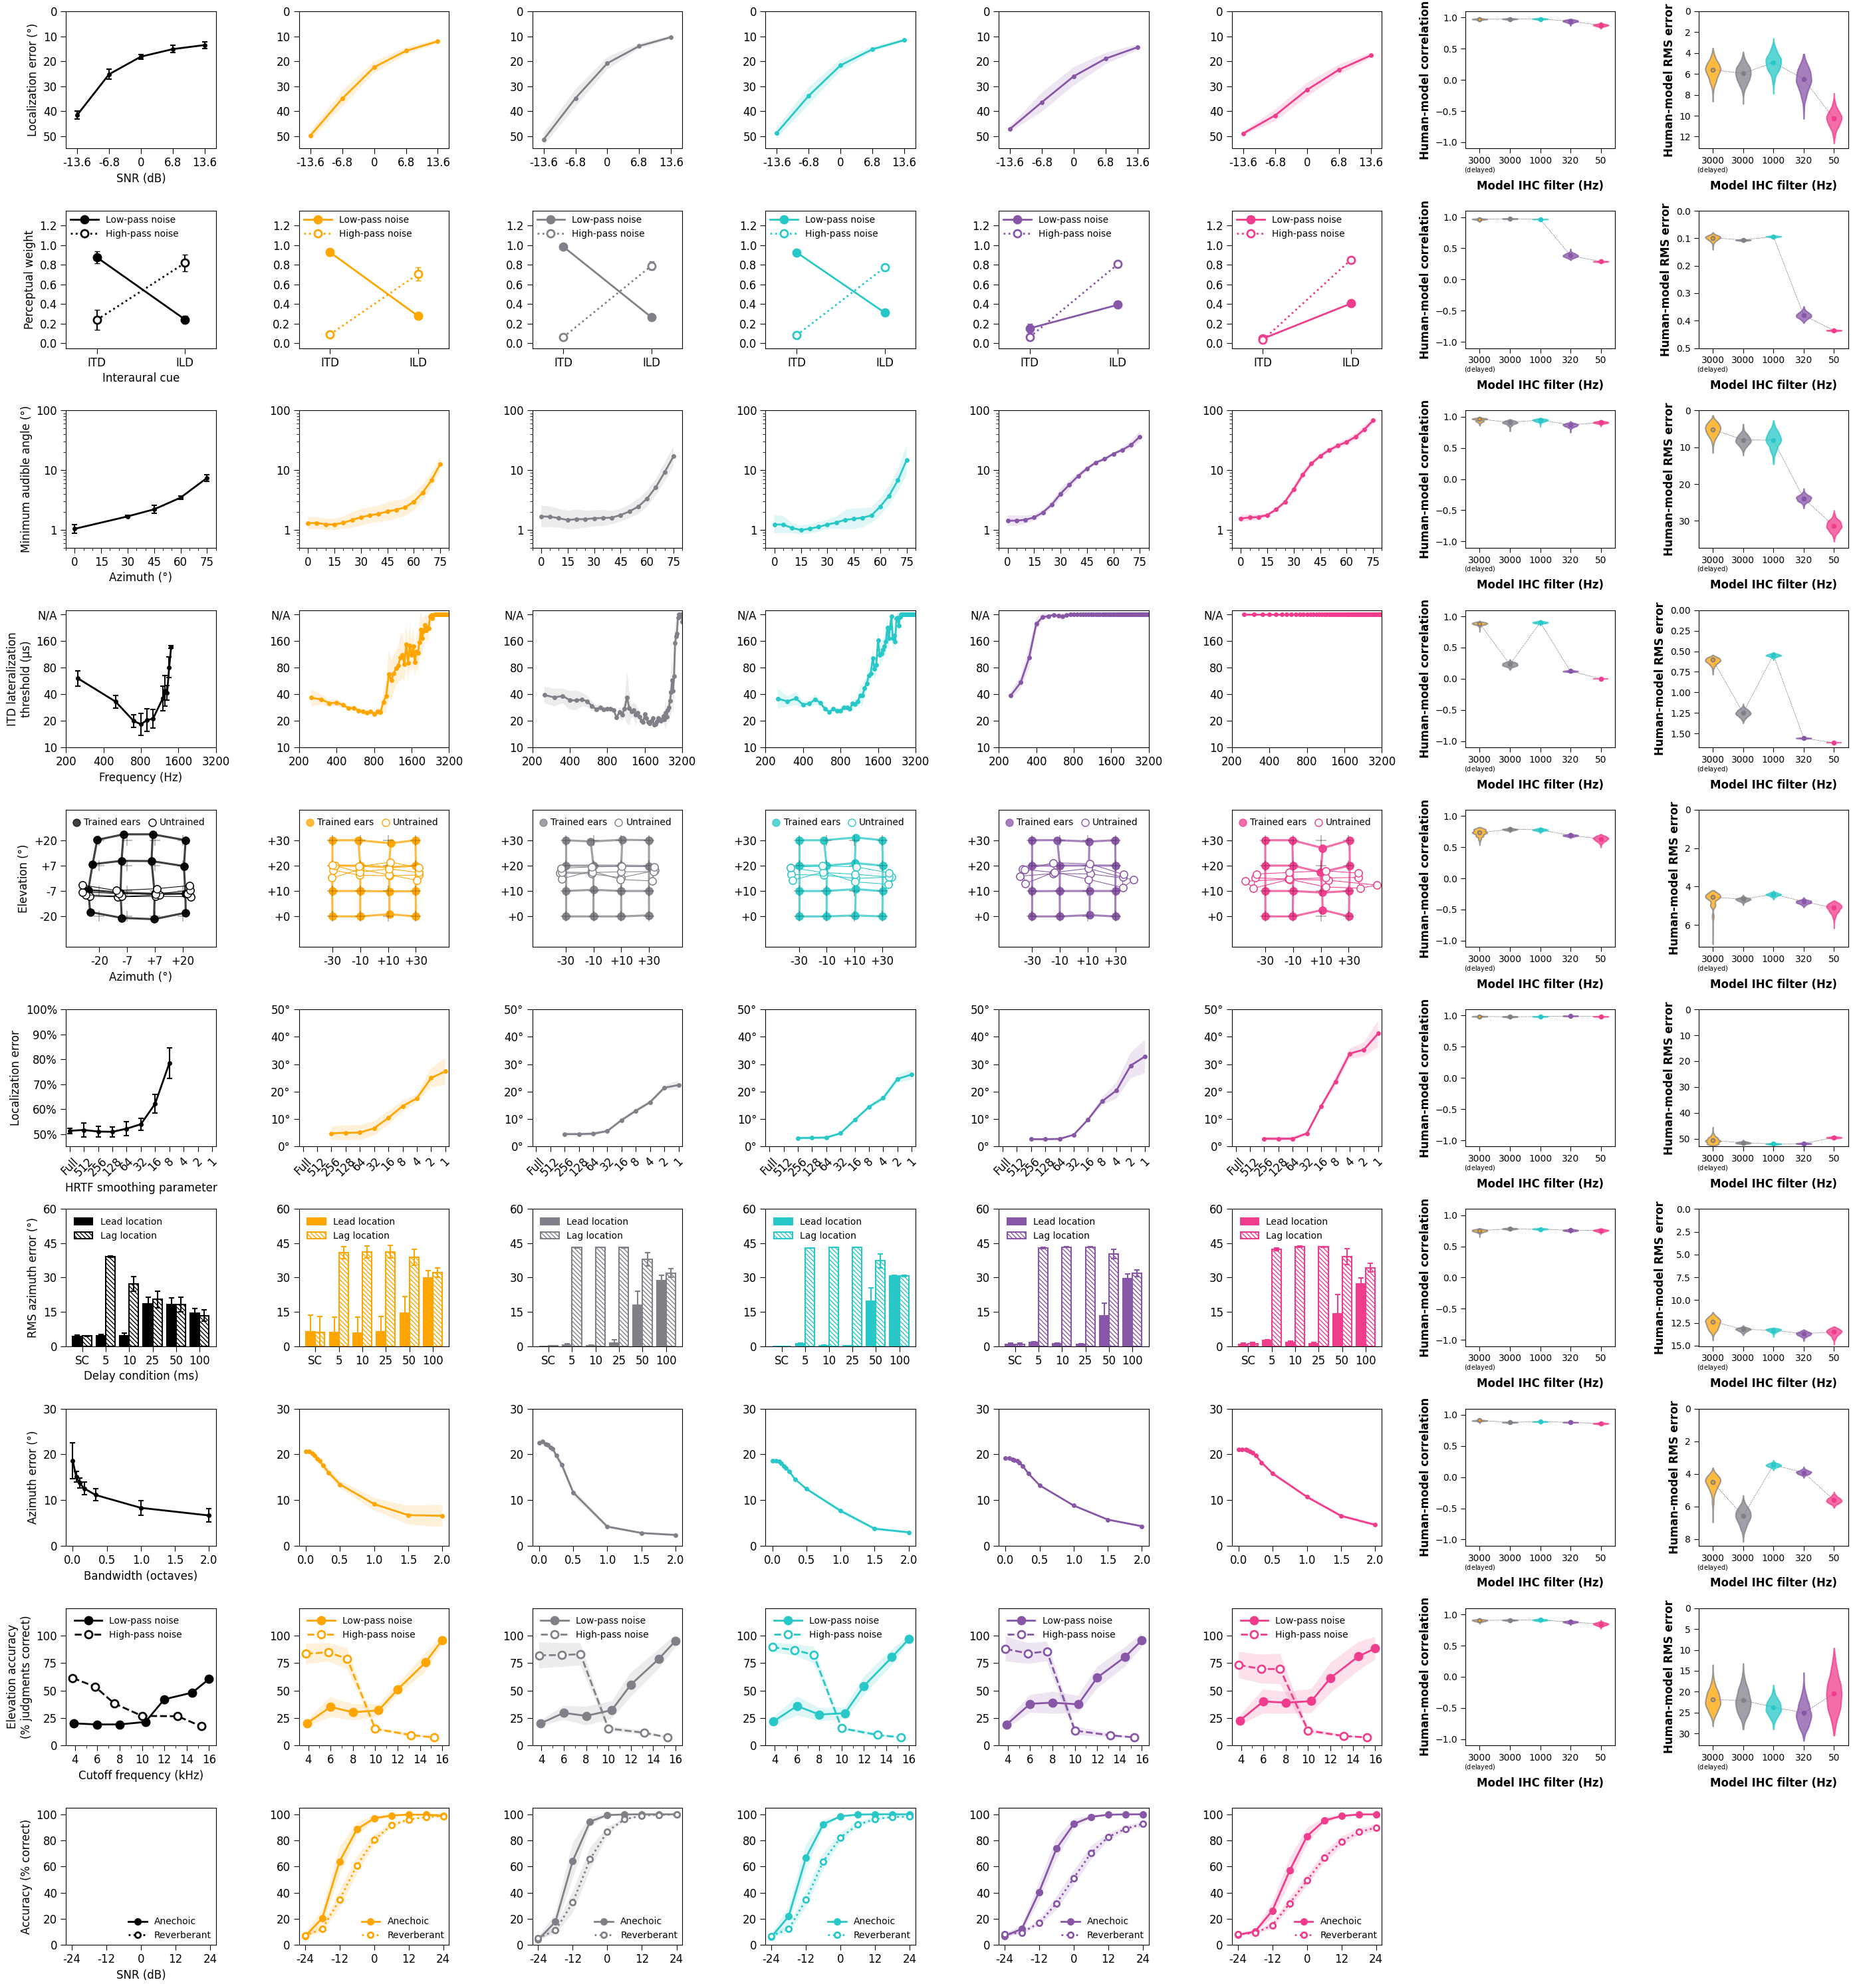

figures_src/results_localization_grid.pdf


In [5]:
importlib.reload(util_localization_psychophysics_figures)
importlib.reload(util)

map_tag_expt_to_plot_func = {
    'snr_dependency': util_localization_psychophysics_figures.make_plot_snr_dependency,
    'itd_ild_weighting': util_localization_psychophysics_figures.make_plot_itd_ild_weighting,
    'maa_azimuth': util_localization_psychophysics_figures.make_plot_maa_azimuth,
    # 'maa_frequency': util_localization_psychophysics_figures.make_plot_maa_frequency,
    'itd_threshold': util_localization_psychophysics_figures.make_plot_itd_threshold,
    'new_ears': util_localization_psychophysics_figures.make_plot_new_ears,
    'spectral_smoothing': util_localization_psychophysics_figures.make_plot_spectral_smoothing,
    'precedence_effect_localization': util_localization_psychophysics_figures.make_plot_precedence_effect_localization,
    'bandwidth_dependency': util_localization_psychophysics_figures.make_plot_bandwidth_dependency,
    'mp_spectral_cues': util_localization_psychophysics_figures.make_plot_mp_spectral_cues,
    'speech_in_noise_in_reverb': util_localization_psychophysics_figures.make_plot_speech_in_noise_in_reverb,
}

list_k = [
    'human',
    '3000_delayed',
    '3000',
    '1000',
    '320',
    '50',

    # 'human',
    # '3000_delayed_simple',
    # '3000_simple',
    # '1000_simple',
    # '320_simple',
    # '50_simple',
]
list_tag_model = [map_k_to_tag_model[k] for k in list_k]

df_comparison = pd.read_pickle('data/human_model_comparison_metrics_localization.pkl')
list_key_metric = [
    'pearsonr',
    'rmse',
]

nrows = len(map_tag_expt_to_plot_func.keys())
ncols = len(list_tag_model) + len(list_key_metric)
figsize = (3.5 * ncols, 3 * nrows)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
ax_arr = ax_arr.reshape([nrows, ncols])
for c, tag_model in enumerate(list_tag_model):
    for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
        ax = ax_arr[r, c]
        df = EXPERIMENT_DATAFRAMES[tag_expt]
        color, _ = util.get_color_and_label_from_model_tag(tag_model)
        if 'pool' in tag_model:
            color = 'orange'
        map_tag_expt_to_plot_func[tag_expt](ax, df[df.tag_model == tag_model], color=color)
        if c > 0:
            ax.xaxis.label.set_color('w')
            ax.yaxis.label.set_color('w')

for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    for itr_metric, key_metric in enumerate(list_key_metric):
        c = len(list_tag_model) + itr_metric
        ax = ax_arr[r, c]
        kwargs_format_axes_update = {
            'fontsize_ticks': 10,
            'fontweight_labels': 'bold',
            'str_ylabel': r'Human-model correlation' if key_metric == 'pearsonr' else 'Human-model RMS error',
            'str_xlabel': 'Model IHC filter (Hz)',
        }
        if key_metric == 'pearsonr':
            kwargs_format_axes_update['ylimits'] = [-1.1, 1.1]
            kwargs_format_axes_update['yticks'] = [-1, -0.5, 0, 0.5, 1]
        if key_metric == 'rmse':
            kwargs_format_axes_update['ylimits'] = [0, None]
        if len(df_comparison[df_comparison.tag_expt == tag_expt]) > 0:
            ax = util.make_plot_comparison_metrics(
                ax,
                df=df_comparison[df_comparison.tag_expt == tag_expt],
                key_metric=key_metric,
                list_tag_model=list_tag_model[1:],
                kwargs_format_axes_update=kwargs_format_axes_update)
            if not key_metric == 'pearsonr':
                ax.invert_yaxis()
            ylim = list(ax.get_ylim())
            if (key_metric == 'rmse') and (ylim[0] < 0.5):
                ylim[0] = 0.5
                ax.set_ylim(ylim)
        else:
            ax.set_axis_off()
plt.tight_layout()
plt.show()

fn_fig = f'figures_src/results_localization_grid.pdf'
if 'simple' in list_k[1]:
    fn_fig = fn_fig.replace('.pdf', '_simple.pdf')
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


figures_src/results_localization_speech_in_noise_in_reverb.pdf


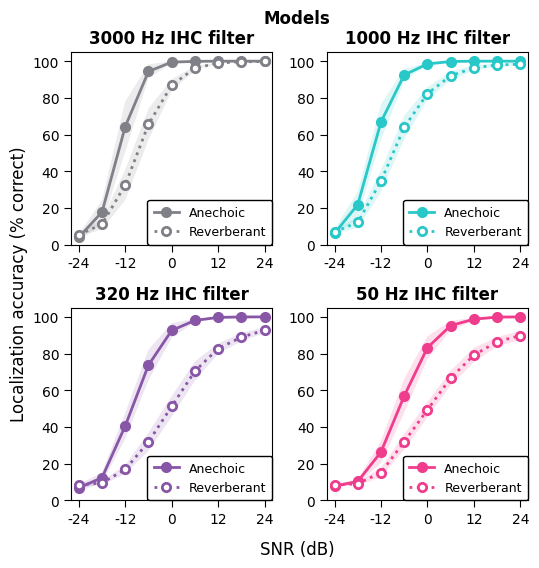

In [10]:
importlib.reload(util_localization_psychophysics_figures)

df_results = EXPERIMENT_DATAFRAMES['speech_in_noise_in_reverb']

list_k_model = [
    '3000',
    '1000',
    '320',
    '50',
]

list_index_room = [1, 0]
fig, ax_arr = plt.subplots(
    nrows=2,
    ncols=np.ceil(len(list_k_model) / 2).astype(int),
    figsize=(5.5, 5.5),
)
ax_arr = ax_arr.reshape([-1])
for itr_ax, k_model in enumerate(list_k_model):
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    ax = ax_arr[itr_ax]
    kwargs_format_axes_update = {
        'str_xlabel': 'SNR (dB)' if itr_ax == 2 else None,
        'str_ylabel': 'Accuracy (% correct)' if itr_ax == 2 else None,
        'str_title': label,
        'fontweight_title': 'bold',
        'fontsize_ticks': 10,
    }
    kwargs_legend_update = {
        'frameon': True,
        'framealpha': 1,
        'borderaxespad': 0,
        'handlelength': 2,
        'fontsize': 9,
    }
    util_localization_psychophysics_figures.make_plot_speech_in_noise_in_reverb(
        ax,
        df_results[df_results.tag_model == tag_model],
        list_index_room=list_index_room,
        color=color,
        kwargs_format_axes_update=kwargs_format_axes_update,
        kwargs_legend_update=kwargs_legend_update,
        include_legend=True)
plt.tight_layout()

ax_arr[2].set_xlabel('SNR (dB)', ha='center', x=1.125, labelpad=10, fontsize=12)
ax_arr[2].set_ylabel('Localization accuracy (% correct)', va='center', y=1.125, labelpad=10, fontsize=12)
fig.suptitle('Models', fontsize=12, fontweight='bold', x=0.55, y=1.01, ha='center', va='top')

fn_fig = 'figures_src/results_localization_speech_in_noise_in_reverb.pdf'
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


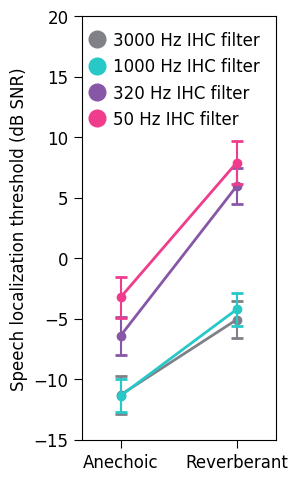

figures_src/results_localization_speech_in_noise_in_reverb_interaction.pdf


In [9]:
df = df_results.explode(['correct_list', 'fn_eval_list']).rename(columns={'correct_list': 'correct', 'fn_eval_list': 'fn_eval'})
df = df.loc[:, ['tag_model', 'fn_eval', 'index_room', 'snr', 'correct']].groupby(['tag_model', 'fn_eval', 'index_room']).agg({
    'snr': list,
    'correct': list,
}).reset_index()

def get_threshold_snr(dfi):
    x = np.array(dfi.snr)
    y = np.array(dfi.correct)
    y = y[~np.isinf(x)]
    x = x[~np.isinf(x)]
    return np.interp(0.707, y, x)

df['threshold'] = df.apply(get_threshold_snr, axis=1)
df_statistics = df[np.logical_and.reduce([
    df.index_room.isin(list_index_room),
    df.tag_model.isin([map_k_to_tag_model[k_model] for k_model in list_k_model]),
])].copy()
df = util_misc.flatten_columns(df.groupby(['tag_model', 'index_room']).agg({
    'threshold': [list, 'mean', 'sem'],
    'fn_eval': [list],
}).reset_index(), sep='_')

fig, ax = plt.subplots(figsize=(2.5, 5.5))
for k_model in list_k_model:
    tag_model = map_k_to_tag_model[k_model]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    dfi = df[np.logical_and.reduce([
        df.tag_model == tag_model,
        df.index_room.isin(list_index_room),
    ])]
    dfi = dfi.sort_values(by='index_room', ascending=False)
    if 'group' in tag_model:
        color = 'orange'
        label = label + ' (delayed)'
    x = np.arange(len(dfi.index_room))
    y = dfi.threshold_mean
    yerr = 2 * dfi.threshold_sem
    ax.errorbar(x, y, yerr=yerr, color=color, marker='', ls='', ms=6, capsize=4, capthick=2, elinewidth=1.5)
    ax.plot(x, y, color=color, marker='o', ms=6, label=label, lw=2)
    # y = np.array(list(dfi.threshold_list.values))
    # ax.plot(x, y, color=color, marker='.', ms=3, ls='')

ax.legend(
    loc='upper left',
    fontsize=12,
    frameon=False,
    handlelength=0,
    handletextpad=1,
    markerscale=2)
ax = util_figures.format_axes(
    ax,
    str_ylabel='Speech localization threshold (dB SNR)',
    xticks=x,
    xlimits=[x[0]-1/3, x[-1] + 1/3],
    ylimits=[-15, 20],
    yticks=np.arange(-15, 21, 5),
    xticklabels=['Anechoic', 'Reverberant'],
)
plt.show()

fn_fig = 'figures_src/results_localization_speech_in_noise_in_reverb_interaction.pdf'
fig.savefig(fn_fig, bbox_inches='tight', pad_inches=0.05, transparent=True)
print(fn_fig)


In [16]:
import pingouin as pg

def permutation_test(seed, n=500):
    np.random.seed(seed)
    null_dist = []
    iterator = np.arange(n) if seed > 0 else tqdm.tqdm(np.arange(n))
    for _ in iterator:
        df_tmp = df_statistics.copy()
        df_tmp['index_room'] = df_tmp['index_room'].sample(frac=1).values
        aov_mixed = pg.mixed_anova(
            data=df_tmp,
            dv='threshold',
            subject='fn_eval',
            within='index_room',
            between='tag_model',
            correction='auto')
        null_dist.append(aov_mixed.F.values[2])
    return null_dist

n = 20
with multiprocessing.Pool(n) as p:
    null_dist = p.map(permutation_test, np.arange(0, n))
null_dist = np.array(null_dist).reshape([-1])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [05:23<00:00,  1.55it/s]


In [19]:
aov_mixed = pg.mixed_anova(
    data=df_statistics,
    dv='threshold',
    subject='fn_eval',
    within='index_room',
    between='tag_model',
    correction='auto')
# print(pg.sphericity(data=df_statistics, dv='threshold', within='index_room', subject='fn_eval'))
# print(pg.homoscedasticity(data=df_statistics, dv='threshold', group='tag_model', method='levene', alpha=0.05))
# print(pg.homoscedasticity(data=df_statistics, dv='threshold', group='index_room', method='levene', alpha=0.05))
# print(pg.normality(data=df_statistics, dv='threshold', group='tag_model', method='shapiro', alpha=0.05))
# print(pg.normality(data=df_statistics, dv='threshold', group='index_room', method='shapiro', alpha=0.05))

print(null_dist.shape, np.mean(np.array(null_dist) >= aov_mixed.F.values[2]), np.sum(np.array(null_dist) >= aov_mixed.F.values[2]))

# fig, ax = plt.subplots()
# ax.hist(null_dist, 100)
# plt.show()

aov_mixed


(10000,) 0.0001 1


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,tag_model,1703.574444,3,36,567.858148,50.648371,5.325653e-13,0.808455,NaN
1,index_room,1701.613129,1,36,1701.613129,2854.931063,6.888364e-36,0.987547,1.0
2,Interaction,134.585250,3,36,44.861750,75.268109,1.407752e-15,0.862493,NaN


In [23]:
np.unique(null_dist).shape


(10000,)